In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from EDMtoolkit import *

In [71]:
filename = "../Datasets/newport/Copepod_Cladoceran_Oikopleura_densities_NH05_1996-present.csv"

data = pd.read_csv(filename, encoding="utf-8")

In [84]:
# first we construct the t time series since it is identical for all species
dates = data["SampleDate"].unique()

days = np.zeros(dates.shape[0])

for i, date_string in enumerate(dates):
    time_tuple = datetime.strptime(date_string, "%m/%d/%Y").timetuple()
    days[i]=time_tuple.tm_yday + time_tuple.tm_year * 365

t = (days - np.min(days)) / np.ptp(days)
n_years = np.ptp(days) / 365

In [3]:
data.head()

,StationCode,NetType,SampleDate,Station,GenusSpecies,LifeHistoryStage,TaxaGrouping,NRows,Sum(Density (#/m3)
0,052196NH05,vertical,05/21/1996,NH05,ACARTIA TONSA,"Female, Adult",Copepod_Southern,1,4.329197
1,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"1, CI",Copepod_Southern,1,43.291966
2,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"2, CII",Copepod_Southern,1,17.316786
3,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"3, CIII",Copepod_Southern,1,34.633573
4,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"4, CIV",Copepod_Southern,1,4.329197


In [86]:
def get_species_series(species_name, life_history_stage):
    
    species_df = data.query('GenusSpecies == ["{}"] and LifeHistoryStage == ["{}"]'.format(species_name, life_history_stage))
    
    dates = data["SampleDate"].unique()
    is_present = np.isin(dates,species_df["SampleDate"].to_numpy())
    time_series = np.zeros(dates.shape[0])
    
    species_abundances = species_df["Sum(Density (#/m3)"].to_numpy()
    j = 0
    
    for i in range(dates.shape[0]):
        if is_present[i]:
            time_series[i] = species_abundances[j]
            j += 1
    
    """
    time_series = species_df["Sum(Density (#/m3)"].to_numpy()
    
    dates = data["SampleDate"].unique()
    time_series = np.zeros(dates.shape[0])
    
    for t in range(time_series.shape[0]):
        
        time_series[t] = 0
    """
    
    return time_series

In [87]:
X = get_species_series('ACARTIA LONGIREMIS', "Female, Adult")

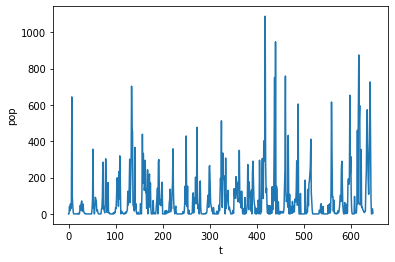

In [88]:
plotTS(X)

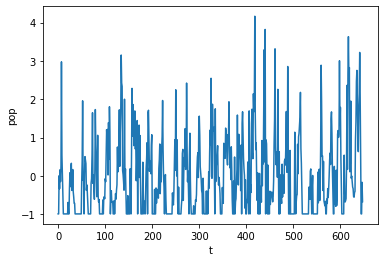

In [89]:
Xr = standardize(np.sqrt(X[:,None]))
plotTS(Xr)

In [90]:
delta_agg = get_delta_agg(Xr, 10, t=t)
n_years / np.sqrt(delta_agg)

10.394304104539133

In [64]:
newport_species_fg = np.array(["",""])
newport_w_s_r2 = np.zeros(2)

In [30]:
for species_name in np.unique(data["GenusSpecies"].to_numpy()):
    functional_groups = np.unique(data.query("GenusSpecies == ['{}']".format(species_name))["LifeHistoryStage"])
    for fg in functional_groups:
        X, t, n_years = get_species_series(species_name, fg)
        north_south = data.query("GenusSpecies == ['{}']".format(species_name))["TaxaGrouping"].to_numpy()[0]
        # print(f"{species_name} {fg} {t.shape[0]} {north_south}")
        print(f"{t.shape[0]} {np.mean(X)} {north_south} {species_name} {fg}")

2 5.6195555509999995 Copepod_Northern ACARTIA LONGIREMIS 2, CII
2 110.96809687150001 Copepod_Northern ACARTIA LONGIREMIS 3, CIII
3 162.47209826733334 Copepod_Northern ACARTIA LONGIREMIS 4, CIV
32 17.663743790031248 Copepod_Northern ACARTIA LONGIREMIS 5, CV
417 111.11269034233332 Copepod_Northern ACARTIA LONGIREMIS Copepodite
472 111.40361410352541 Copepod_Northern ACARTIA LONGIREMIS Female, Adult
437 120.70648185887872 Copepod_Northern ACARTIA LONGIREMIS Male, Adult
1 4.09730675 Copepod_Southern ACARTIA TONSA 1, CI
2 8.0781771865 Copepod_Southern ACARTIA TONSA 2, CII


c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


4 7.2844341105 Copepod_Southern ACARTIA TONSA 3, CIII
7 5.965418970571428 Copepod_Southern ACARTIA TONSA 4, CIV
44 17.53864122118182 Copepod_Southern ACARTIA TONSA 5, CV
101 97.0350707499208 Copepod_Southern ACARTIA TONSA Copepodite
145 25.212418470220687 Copepod_Southern ACARTIA TONSA Female, Adult
136 23.94659795202941 Copepod_Southern ACARTIA TONSA Male, Adult
356 37.51519553551124 Copepod_Northern CALANUS MARSHALLAE 1, CI
333 30.004590069684685 Copepod_Northern CALANUS MARSHALLAE 2, CII
310 30.882479031964518 Copepod_Northern CALANUS MARSHALLAE 3, CIII
266 23.43072612990977 Copepod_Northern CALANUS MARSHALLAE 4, CIV
213 16.924905747014083 Copepod_Northern CALANUS MARSHALLAE 5, CV
1 147.8868118 Copepod_Northern CALANUS MARSHALLAE Copepodite
218 14.884273015522936 Copepod_Northern CALANUS MARSHALLAE Female, Adult
83 8.399151728144577 Copepod_Northern CALANUS MARSHALLAE Male, Adult
185 18.682715912432432 Copepod_Southern CALANUS PACIFICUS 1, CI
154 19.49876905320779 Copepod_Southern C

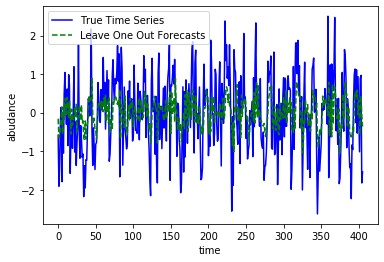

c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


ACARTIA LONGIREMIS Copepodite, stationary window = inf years, r^2 = 0.110


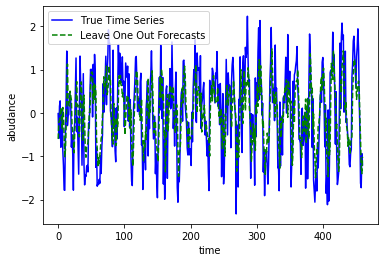

ACARTIA LONGIREMIS Female, Adult, stationary window = 126.775 years, r^2 = 0.383


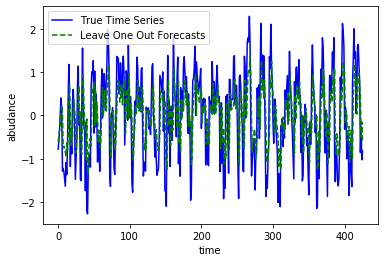

ACARTIA LONGIREMIS Male, Adult, stationary window = 46.877 years, r^2 = 0.342


c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


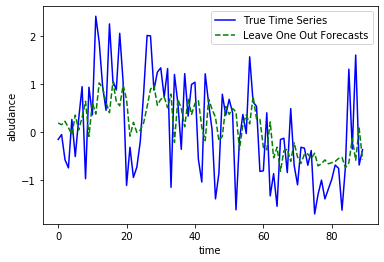

ACARTIA TONSA Copepodite, stationary window = 13.006 years, r^2 = 0.210


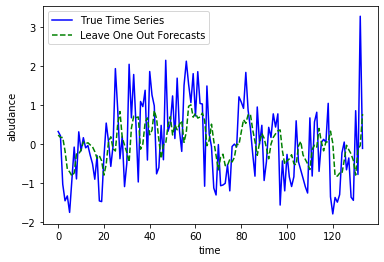

ACARTIA TONSA Female, Adult, stationary window = 12.258 years, r^2 = 0.162


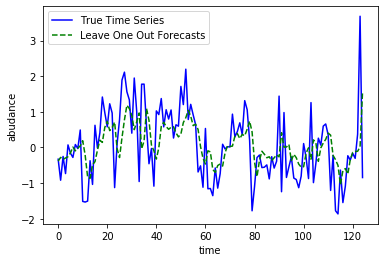

ACARTIA TONSA Male, Adult, stationary window = 28.764 years, r^2 = 0.194


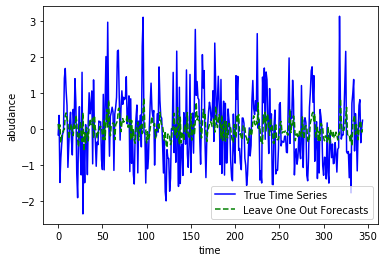

CALANUS MARSHALLAE 1, CI, stationary window = inf years, r^2 = 0.060


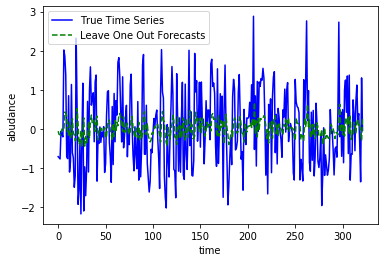

CALANUS MARSHALLAE 2, CII, stationary window = 95.399 years, r^2 = 0.037


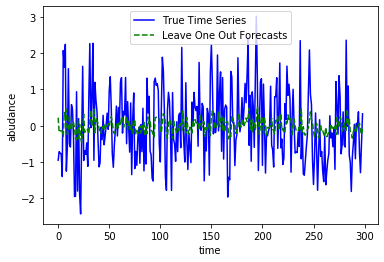

CALANUS MARSHALLAE 3, CIII, stationary window = inf years, r^2 = 0.024


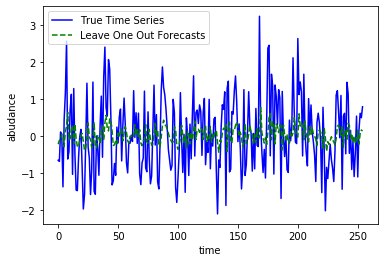

CALANUS MARSHALLAE 4, CIV, stationary window = 260.619 years, r^2 = 0.036


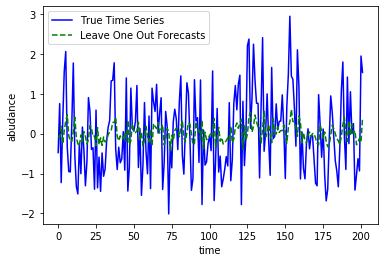

CALANUS MARSHALLAE 5, CV, stationary window = inf years, r^2 = 0.028


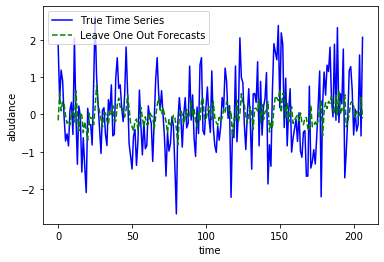

CALANUS MARSHALLAE Female, Adult, stationary window = 36.592 years, r^2 = 0.059


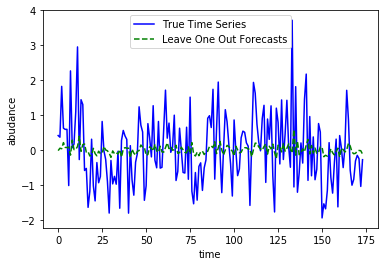

CALANUS PACIFICUS 1, CI, stationary window = inf years, r^2 = 0.001


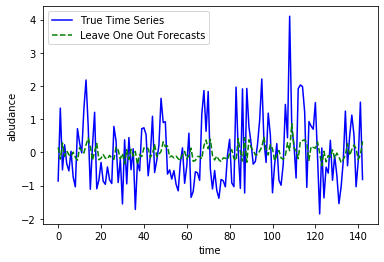

CALANUS PACIFICUS 2, CII, stationary window = inf years, r^2 = 0.022


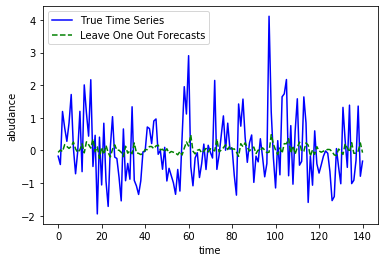

CALANUS PACIFICUS 3, CIII, stationary window = inf years, r^2 = 0.001


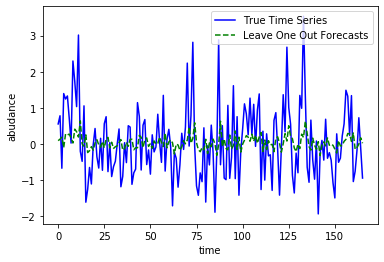

CALANUS PACIFICUS 4, CIV, stationary window = 61.847 years, r^2 = 0.016


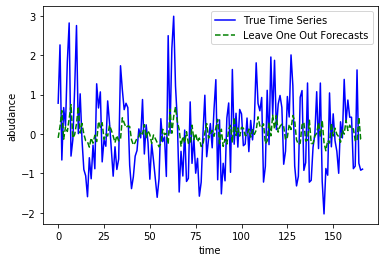

CALANUS PACIFICUS 5, CV, stationary window = inf years, r^2 = 0.032


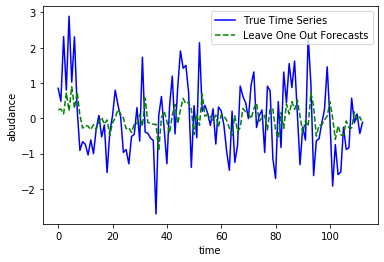

CALANUS PACIFICUS Female, Adult, stationary window = 100.931 years, r^2 = 0.073


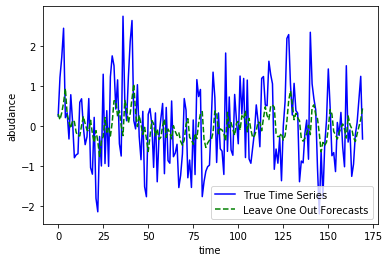

CALOCALANUS Female, Adult, stationary window = inf years, r^2 = 0.084


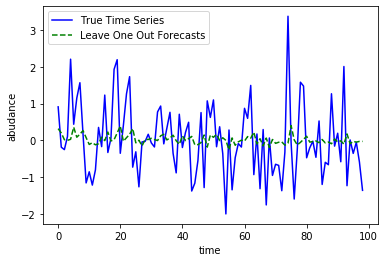

CENTROPAGES 2, CII, stationary window = 69.750 years, r^2 = 0.000


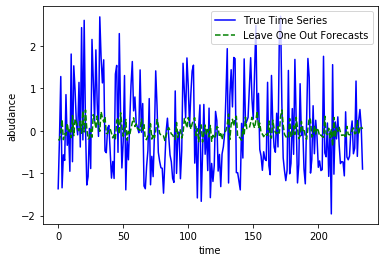

CENTROPAGES 3, CIII, stationary window = inf years, r^2 = 0.017


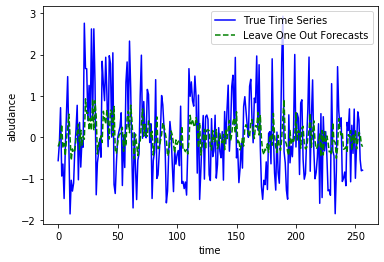

CENTROPAGES 4, CIV, stationary window = 59.583 years, r^2 = 0.083


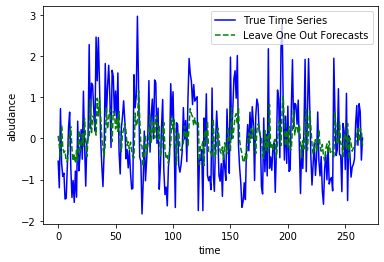

CENTROPAGES 5, CV, stationary window = 73.274 years, r^2 = 0.125


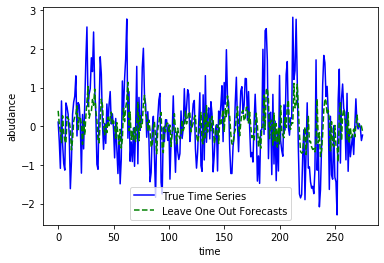

CENTROPAGES Female, Adult, stationary window = inf years, r^2 = 0.140


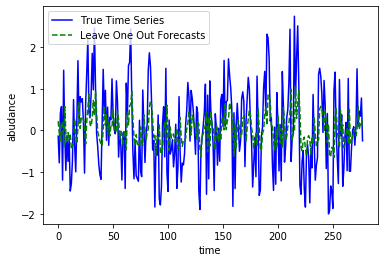

CENTROPAGES Male, Adult, stationary window = inf years, r^2 = 0.120


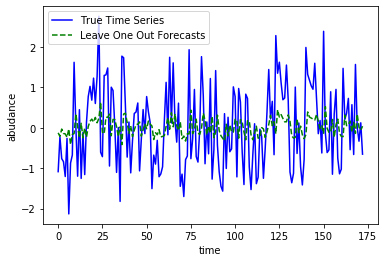

CLAUSOCALANUS 5, CV, stationary window = inf years, r^2 = 0.024


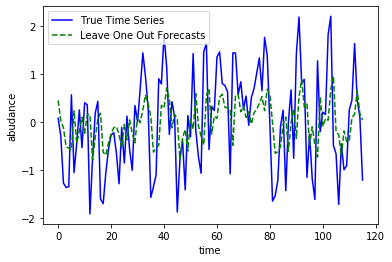

CLAUSOCALANUS Copepodite, stationary window = 369.193 years, r^2 = 0.138


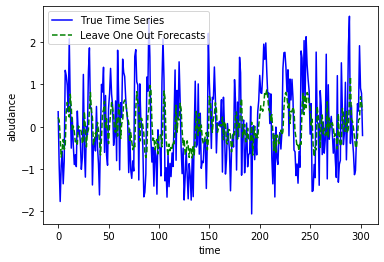

CLAUSOCALANUS Female, Adult, stationary window = inf years, r^2 = 0.152


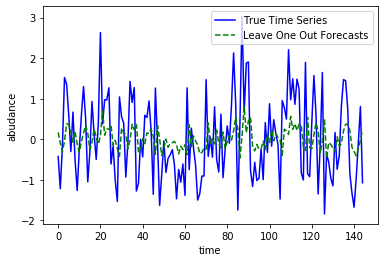

CLAUSOCALANUS Male, Adult, stationary window = inf years, r^2 = 0.044


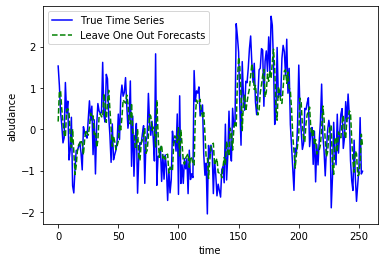

CORYCAEUS ANGLICUS Copepodite, stationary window = 2.260 years, r^2 = 0.440


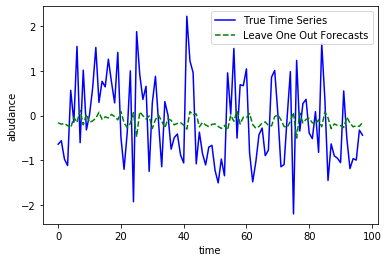

CTENOCALANUS VANUS 5, CV, stationary window = 77.402 years, r^2 = 0.002


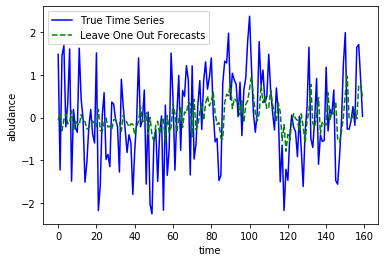

CTENOCALANUS VANUS Copepodite, stationary window = 24.697 years, r^2 = 0.093


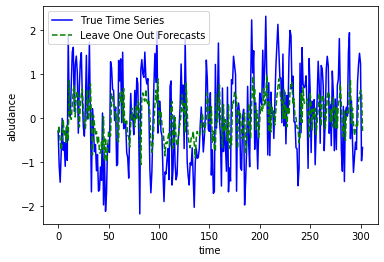

CTENOCALANUS VANUS Female, Adult, stationary window = 60.445 years, r^2 = 0.182


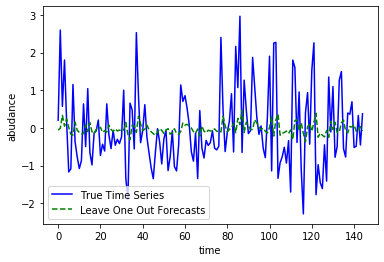

CTENOCALANUS VANUS Male, Adult, stationary window = inf years, r^2 = 0.001


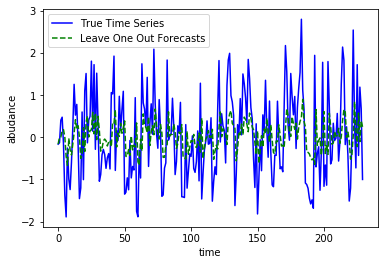

EVADNE Unknown, stationary window = inf years, r^2 = 0.098


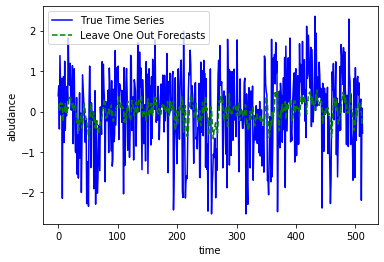

OIKOPLEURA Unknown, stationary window = inf years, r^2 = 0.042


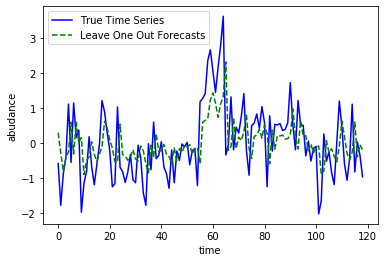

ONCAEA Copepodite, stationary window = 141.847 years, r^2 = 0.225


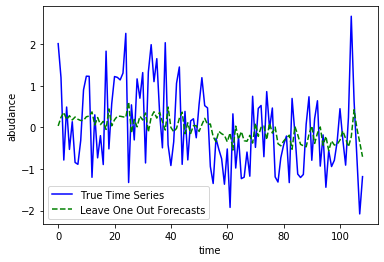

PARACALANUS PARVUS 5, CV, stationary window = 14.947 years, r^2 = 0.051


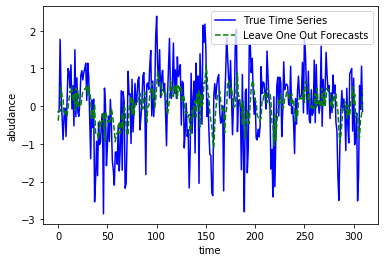

PARACALANUS PARVUS Copepodite, stationary window = 61.493 years, r^2 = 0.137


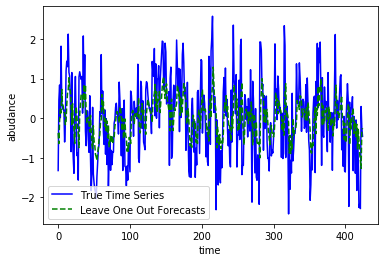

PARACALANUS PARVUS Female, Adult, stationary window = 61.552 years, r^2 = 0.188


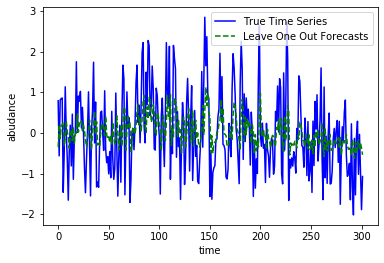

PARACALANUS PARVUS Male, Adult, stationary window = 13.677 years, r^2 = 0.109


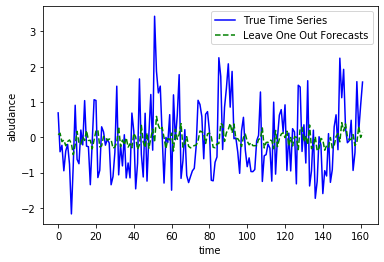

PODON Unknown, stationary window = inf years, r^2 = 0.025


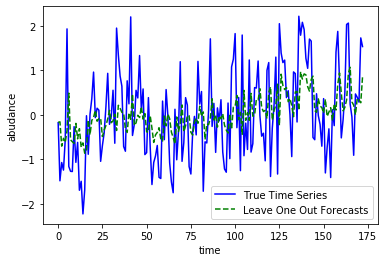

PSEUDOCALANUS 1, CI, stationary window = 17.713 years, r^2 = 0.147


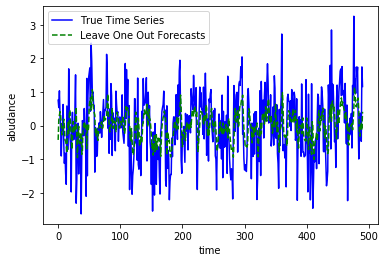

PSEUDOCALANUS 2, CII, stationary window = inf years, r^2 = 0.161


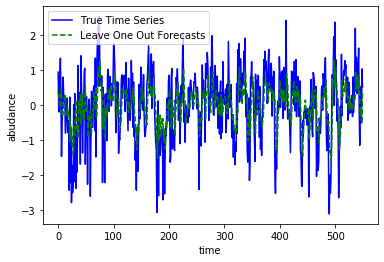

PSEUDOCALANUS 3, CIII, stationary window = 40.712 years, r^2 = 0.236


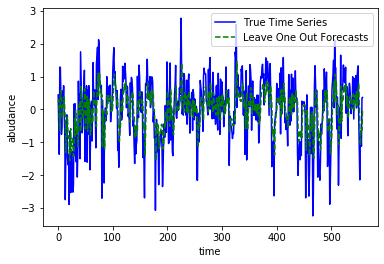

PSEUDOCALANUS 4, CIV, stationary window = inf years, r^2 = 0.279


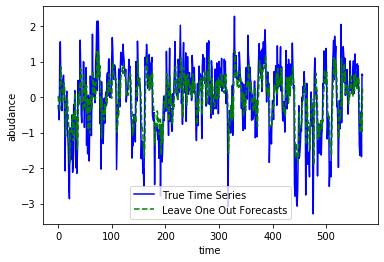

PSEUDOCALANUS 5, CV, stationary window = inf years, r^2 = 0.380


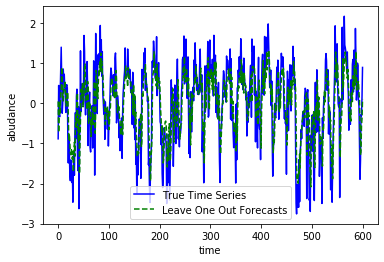

PSEUDOCALANUS Female, Adult, stationary window = inf years, r^2 = 0.479


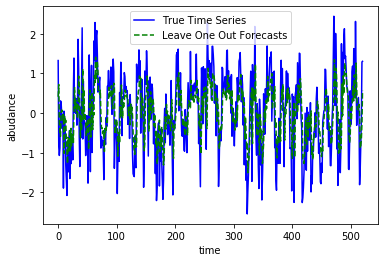

PSEUDOCALANUS Male, Adult, stationary window = 95.186 years, r^2 = 0.334


In [11]:
for species_name in np.unique(data["GenusSpecies"].to_numpy()):
    functional_groups = np.unique(data.query("GenusSpecies == ['{}']".format(species_name))["LifeHistoryStage"])
    
    for fg in functional_groups:
        X, t, n_years = get_species_series(species_name, fg)
    
    if X.shape[0] < 100:
        continue

    Xr = standardize(np.log(X[:,None]+1))
    # plotTS(Xr, title=species_name + " " + fg)

    delta_agg, r_sqrd, ns_area = get_delta_agg(Xr, 10, t=t, return_forecast_skill=True)

    w_s = n_years / np.sqrt(delta_agg)

    newport_species_fg = np.vstack([newport_species_fg, np.array([species_name, fg])])
    newport_w_s_r2 = np.vstack([newport_w_s_r2, np.array([w_s, r_sqrd])])

    print(f"{species_name} {fg}, stationary window = {w_s:.3f} years, r^2 = {r_sqrd:.3f}")

In [15]:
# np.savetxt("newport_species_fg.txt", newport_species_fg, fmt=["%s;","%s"])
# np.savetxt("newport_w_s_r2.txt", newport_w_s_r2, delimiter=",")

In [15]:
newport_w_s_r2 = np.loadtxt("newport_w_s_r2.txt", delimiter=",")
newport_species_fg = np.loadtxt("newport_species_fg.txt", delimiter=";", dtype=str)

([array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([  0.20944025,  12.34943499,  24.48942973,  36.62942447,
         48.76941921,  60.90941394,  73.04940868,  85.18940342,
         97.32939816, 109.4693929 , 121.60938764]),
 <a list of 2 Lists of Patches objects>)

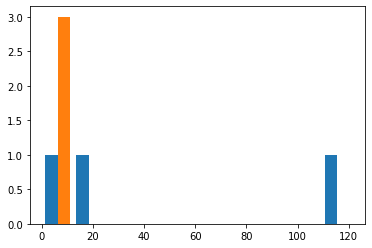

In [16]:
plt.hist(newport_w_s_r2[np.logical_and(newport_w_s_r2[:,1] > 0.2, np.isfinite(newport_w_s_r2[:,0]))])

In [30]:
np.mean(np.isfinite(newport_w_s_r2[newport_w_s_r2[:,1] > 0.2][:,0]))

0.6

In [17]:
for species, genus, w_s, r_sqrd in np.hstack([newport_species_fg, newport_w_s_r2]):
    print(f"{species} {genus}, w_s = {float(w_s):.3f}, r^2 = {float(r_sqrd):.3f}")

ACARTIA LONGIREMIS  Copepodite, w_s = inf, r^2 = 0.042
ACARTIA LONGIREMIS  Female, Adult, w_s = 18.084, r^2 = 0.209
ACARTIA LONGIREMIS  Male, Adult, w_s = 121.609, r^2 = 0.237
ACARTIA TONSA  Copepodite, w_s = 11.694, r^2 = 0.091
ACARTIA TONSA  Female, Adult, w_s = 65.672, r^2 = 0.014
ACARTIA TONSA  Male, Adult, w_s = inf, r^2 = 0.000
CALANUS MARSHALLAE  1, CI, w_s = inf, r^2 = 0.007
CALANUS MARSHALLAE  2, CII, w_s = 203.735, r^2 = 0.013
CALANUS MARSHALLAE  3, CIII, w_s = inf, r^2 = 0.014
CALANUS MARSHALLAE  4, CIV, w_s = inf, r^2 = 0.005
CALANUS MARSHALLAE  5, CV, w_s = inf, r^2 = 0.037
CALANUS MARSHALLAE  Female, Adult, w_s = 22.628, r^2 = 0.048
CALANUS PACIFICUS  1, CI, w_s = inf, r^2 = 0.153
CALANUS PACIFICUS  2, CII, w_s = 40.468, r^2 = 0.000
CALANUS PACIFICUS  3, CIII, w_s = inf, r^2 = 0.286
CALANUS PACIFICUS  4, CIV, w_s = 35.670, r^2 = 0.012
CALANUS PACIFICUS  5, CV, w_s = 139.259, r^2 = 0.004
CALANUS PACIFICUS  Female, Adult, w_s = 17.705, r^2 = 0.131
CALOCALANUS  Female, Adult

In [31]:
datetime.strptime(data["Sample Date"].to_numpy()[0], "%m/%d/%Y").timetuple().tm_yday

142

In [3]:
data.query("Genus Species == ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14548 entries, 0 to 14547
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station Code        14548 non-null  object 
 1   Net Type            14548 non-null  object 
 2   Sample Date         14548 non-null  object 
 3   Station             14548 non-null  object 
 4   Genus Species       14548 non-null  object 
 5   Life History Stage  14548 non-null  object 
 6   Taxa Grouping       14548 non-null  object 
 7   N Rows              14548 non-null  int64  
 8   Sum(Density (#/m3)  14548 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 625.2+ KB


In [7]:
anomaly_file = "../Datasets/cciea_EI_COP_cleaned.csv"

southern_TS = pd.read_csv(anomaly_file).query("timeseries==['SouthernBiomassAnomaly']")["index"].to_numpy()
northern_TS = pd.read_csv(anomaly_file).query("timeseries==['NorthernBiomassAnomaly']")["index"].to_numpy()

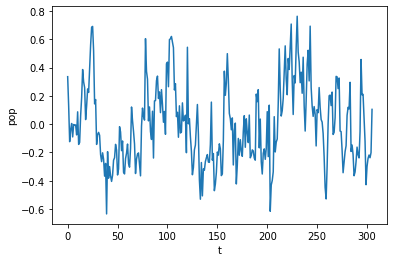

In [8]:
plotTS(southern_TS)

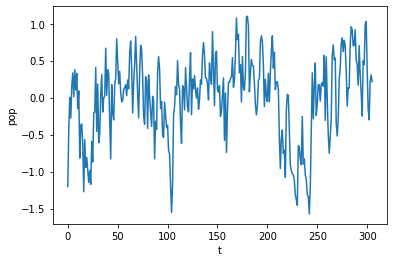

In [9]:
plotTS(northern_TS)

In [10]:
t = np.linspace(0,1,num=northern_TS.shape[0])

In [11]:
delta_agg_n, theta_n, r_sqrd_n = get_delta_agg(northern_TS, 10, t=t, return_forecast_skill=True)
delta_agg_s, theta_s, r_sqrd_s = get_delta_agg(southern_TS, 10, t=t, return_forecast_skill=True)

In [14]:
delta_agg_s

0.0

In [53]:
r_sqrd_s

0.5659025325626948

In [54]:
# I'm going to try to reconstruct the detrended data

data.query("TaxaGrouping == ['Copepod_Southern']")

,StationCode,NetType,SampleDate,Station,GenusSpecies,LifeHistoryStage,TaxaGrouping,NRows,Sum(Density (#/m3)
0,052196NH05,vertical,05/21/1996,NH05,ACARTIA TONSA,"Female, Adult",Copepod_Southern,1,4.329197
1,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"1, CI",Copepod_Southern,1,43.291966
2,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"2, CII",Copepod_Southern,1,17.316786
3,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"3, CIII",Copepod_Southern,1,34.633573
4,052196NH05,vertical,05/21/1996,NH05,CALANUS PACIFICUS,"4, CIV",Copepod_Southern,1,4.329197
...,...,...,...,...,...,...,...,...,...
14519,032422NH05,vertical,03/24/2022,NH05,MESOCALANUS TENUICORNIS,"1, CI",Copepod_Southern,1,6.196824
14520,032422NH05,vertical,03/24/2022,NH05,MESOCALANUS TENUICORNIS,"5, CV",Copepod_Southern,1,6.196824
14537,041422NH05,vertical,04/14/2022,NH05,CTENOCALANUS VANUS,"5, CV",Copepod_Southern,1,8.307337
14538,041422NH05,vertical,04/14/2022,NH05,CTENOCALANUS VANUS,"Female, Adult",Copepod_Southern,1,8.307337


In [19]:
np.set_printoptions(suppress=True)

In [26]:
sorted_indices = np.flip(newport_w_s_r2[:,1].argsort())
newport_w_s_r2[sorted_indices]
newport_species_fg[sorted_indices]

array([['CORYCAEUS ANGLICUS', ' Copepodite'],
       ['CALANUS PACIFICUS', ' 3, CIII'],
       ['PSEUDOCALANUS', ' Female, Adult'],
       ['ACARTIA LONGIREMIS', ' Male, Adult'],
       ['ACARTIA LONGIREMIS', ' Female, Adult'],
       ['PSEUDOCALANUS', ' Male, Adult'],
       ['PSEUDOCALANUS', ' 5, CV'],
       ['PSEUDOCALANUS', ' 4, CIV'],
       ['CALANUS PACIFICUS', ' 1, CI'],
       ['CALANUS PACIFICUS', ' Female, Adult'],
       ['CTENOCALANUS VANUS', ' Female, Adult'],
       ['CLAUSOCALANUS', ' Copepodite'],
       ['PARACALANUS PARVUS', ' Female, Adult'],
       ['PSEUDOCALANUS', ' 1, CI'],
       ['PSEUDOCALANUS', ' 3, CIII'],
       ['PARACALANUS PARVUS', ' Male, Adult'],
       ['PARACALANUS PARVUS', ' Copepodite'],
       ['CENTROPAGES', ' Female, Adult'],
       ['ACARTIA TONSA', ' Copepodite'],
       ['CLAUSOCALANUS', ' Female, Adult'],
       ['CENTROPAGES', ' Male, Adult'],
       ['PSEUDOCALANUS', ' 2, CII'],
       ['CALANUS MARSHALLAE', ' Female, Adult'],
       ['O